# Pre & Post Training Feedback Analysis

In this analysis, we aim to explore the feedback gathered through Google Forms before and after the Citizens Digital Skills TOT training that took place in the month of January, 2024, aiming to extract insights that can contribute to the ongoing improvement and effectiveness of the training program.

The purpose of the conducted training was to empower 100 Trainers of Trainers (TOTs) representing 50 learning institutions. The primary aim was to equip them to deliver digital skills training effectively and efficiently to the citizens they will be engaging with.
Furthermore, the training initiative seeked to standardize training methods and delivery strategies across participating institutions. This standardization ensured that the digital skills training programs maintain a consistent and high-quality standard, benefiting both the trainers and the citizens receiving the training.

### Import libraries
To begin, we import the necessary libraries for our analysis. Pandas (Data Manipulation), Numpy (Scientific Calculations) and Matplotlib & Seaborn (Visualization)

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# # Set the display option to show the full content of a cell
# pd.set_option('display.max_colwidth', None)

# Set the plotting style
sns.set(style="whitegrid")

## Pre-training

Load the PRE-training feedback data into a Pandas DataFrame and inspect the first few rows to get a glimpse of the dataset.

In [4]:
# Load the training feedback data
df_pre = pd.read_csv('data/tot_pre_training_feedback.csv')

# Display the first few rows of the dataset
df_pre.head()

,Timestamp,What are your expectations of the training?,"Based on the training program, are there area(s) of interest(s) that may have not been covered?",Give more information about the area(s),What can we improve on to better your training experience
0,2024/01/15 4:31:48 AM PST,Be able to implement the trained area in leani...,No,NaN,You should be more practical rather than theor...
1,2024/01/15 4:35:59 AM PST,To understand the content of the curriculum,No,NaN,Let's discuss the curriculum first then pedago...
2,2024/01/15 4:37:37 AM PST,To learn and know how to interact with the stu...,Yes,Curriculum,Time management
3,2024/01/15 4:38:38 AM PST,Learn the best methodology to conduct training...,No,NaN,make the training more interractive and includ...
4,2024/01/15 4:39:22 AM PST,Understand the requirements to establish train...,Yes,Platform used to run the program,Time management


To enhance readability and simplicity, we rename the columns. The new column names will provide a clear and concise representation of the information they contain.

In [5]:
# Renaming columns for better readability
df_pre = df_pre.rename(columns={
    'What are your expectations of the training?': 'expectations',
    'Based on the training program, are there area(s) of interest(s) that may have not been covered?': 'mayNot_be_covered',
    'Give more information about the area(s)': 'info_area',
    'What can we improve on to better your training experience': 'improvements',
    })

# Display the updated column names
df_pre.columns

Index(['Timestamp', 'expectations', 'mayNot_be_covered', 'info_area',
       'improvements'],
      dtype='object')

Additionally, it been decided to exclude the `timestamp` column from the analysis as it does not contribute to the current objectives.

In [6]:
# Dropping the timestamp column
df_pre = df_pre.drop('Timestamp', axis=1)


# Display the dataset after dropping the timestamp column
df_pre.head()

,expectations,mayNot_be_covered,info_area,improvements
0,Be able to implement the trained area in leani...,No,NaN,You should be more practical rather than theor...
1,To understand the content of the curriculum,No,NaN,Let's discuss the curriculum first then pedago...
2,To learn and know how to interact with the stu...,Yes,Curriculum,Time management
3,Learn the best methodology to conduct training...,No,NaN,make the training more interractive and includ...
4,Understand the requirements to establish train...,Yes,Platform used to run the program,Time management


Examine the current shape of the dataset to understand its size and dimensions.

In [7]:
# Displaying the shape of the dataset
df_pre.shape

(59, 4)

Gather detailed information about the dataset using the `info()` function.

In [8]:
# Displaying information about the dataset
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   expectations       59 non-null     object
 1   mayNot_be_covered  59 non-null     object
 2   info_area          19 non-null     object
 3   improvements       57 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


Upon reviewing the feedback columns (Expectations, Areas Not Covered, Improvements), it was observed that all three columns contain non-numeric data. To facilitate a more organized analysis, we have grouped these columns into distinct themes. The themes are as follows:

1. **expectations_category:**
   - This theme encapsulates feedback related to participants' expectations for the training.

2. **areas_mayNot_be_covered:**
   - Feedback in this theme pertains to areas or topics that participants felt were not adequately covered during the training.

3. **areas_of_improvement:**
   - The Improvements theme includes feedback on suggestions and areas for enhancement in the training program.

Here is the pre-trainig file `pre_tot_training_feedback.csv` with the themes and categories filled.



In [9]:
# Displaying the updated dataset with themes
df_pre = pd.read_csv('data/pre_tot_training_feedback.csv')
df_pre.head()

,expectations,expectations_category,mayNot_be_covered,info_area,areas_mayNot_be_covered,improvements,areas_of_improvement
0,Be able to implement the trained area in leani...,Training Implementation and Delivery,No,NaN,NaN,You should be more practical rather than theor...,Curriculumn
1,To understand the content of the curriculum,Program Understanding and Development,No,NaN,NaN,Let's discuss the curriculum first then pedago...,Curriculumn
2,To learn and know how to interact with the stu...,Training Implementation and Delivery,Yes,Curriculum,Curriculum Development,Time management,Time management
3,Learn the best methodology to conduct training...,Training Implementation and Delivery,No,NaN,NaN,make the training more interractive and includ...,Participant Engagement
4,Understand the requirements to establish train...,Program Understanding and Development,Yes,Platform used to run the program,Platform and Program Execution,Time management,Time management


### Expectations of the training

In [10]:
df_pre[['expectations', 'expectations_category']].head()

,expectations,expectations_category
0,Be able to implement the trained area in leani...,Training Implementation and Delivery
1,To understand the content of the curriculum,Program Understanding and Development
2,To learn and know how to interact with the stu...,Training Implementation and Delivery
3,Learn the best methodology to conduct training...,Training Implementation and Delivery
4,Understand the requirements to establish train...,Program Understanding and Development


We aimed to categorize the expectations expressed by participants into distinct themes.

In [11]:
# Displaying the unique categories and their counts
exp_grps = df_pre['expectations_category'].value_counts()
exp_grps

Program Understanding and Development      15
Training Implementation and Delivery       14
Expectations and Overall Program Goals     11
Skill Acquisition and Application          10
Networking and Professional Development     9
Name: expectations_category, dtype: int64

## Expectations Analysis Results

After analyzing the "Expectations" column, we have identified several categories of expectations expressed by participants. Here are the key categories along with their respective counts:

1. **Program Understanding and Development:** 15 responses
2. **Training Implementation and Delivery:** 14 responses
3. **Expectations and Overall Program Goals:** 11 responses
4. **Skill Acquisition and Application:** 10 responses
5. **Networking and Professional Development:** 9 responses

These categories provide a preliminary understanding of the diverse expectations participants had before the training.

- Check the feedback provided in the "Program Understanding and Development" category, which emerged as the highest category in terms of expectations.

In [12]:
# Displaying the feedback for the highest category "Program Understanding and Development"
df_pre[df_pre['expectations_category'] == 'Program Understanding and Development'][['expectations']]

,expectations
1,To understand the content of the curriculum
4,Understand the requirements to establish train...
10,Learn how to develop learning tools such as tr...
13,To understand the modules of the programm
16,Understand the app
21,To learn more about the curriculum and the exp...
22,To learn learn and be able roll out the Digita...
24,To learn how to tailor the course content and ...
33,To come up with a clear content on how to deli...
34,"Understand curriculum content, tools to develo..."


Visualize the categories of expectations using a horizontal bar plot. This graphical representation provides a clear overview of the distribution of expectations among the identified categories.


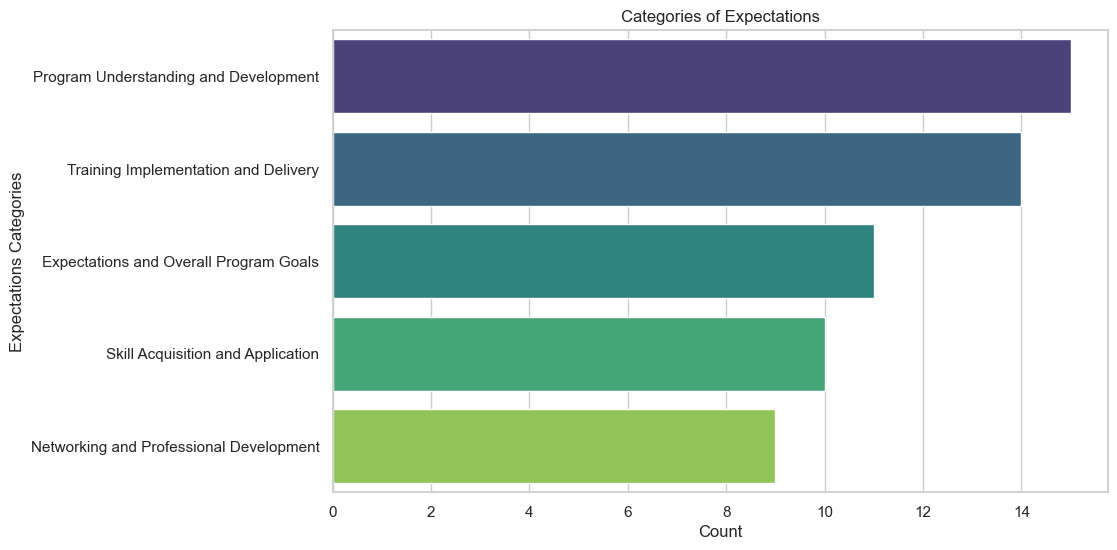

In [13]:
# Plotting the categories of expectations
plt.figure(figsize=(10, 6))
sns.countplot(y='expectations_category', data=df_pre, order=df_pre['expectations_category'].value_counts().index, palette='viridis')
plt.title('Categories of Expectations')
plt.xlabel('Count')
plt.ylabel('Expectations Categories');

### Areas of interest that may have not been covered

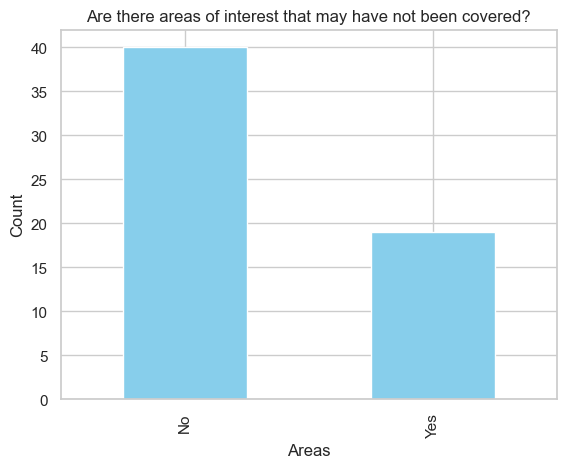

In [14]:
# value count for YES and NO
yes_v_no = df_pre['mayNot_be_covered'].value_counts()

# Plotting a bar chart
yes_v_no.plot(kind='bar', color='skyblue')
plt.title('Are there areas of interest that may have not been covered?')
plt.xlabel('Areas')
plt.ylabel('Count');

`19` of the 59 responses indicated that based on the training program, are there area(s) of interest(s) that may have not been covered.

Here are some themes to categorize the provided comments on "areas of interests that may have not been covered":
- Curriculum Development
- Platform and Program Execution
- Marketing and Outreach
- Inclusivity and Accessibility
- specialized Areas of Interest:

In [15]:
# Value count for the non-null responses under areas not covered
mask = df_pre['areas_mayNot_be_covered'].isna() == False
area_notCovered_count = df_pre[mask]['areas_mayNot_be_covered'].value_counts()
area_notCovered_count

Curriculum Development            6
Marketing and Outreach            5
Specialized Areas of Interest     3
Platform and Program Execution    2
Inclusivity and Accessibility     1
Name: areas_mayNot_be_covered, dtype: int64

In [16]:
df_pre[mask][['info_area', 'areas_mayNot_be_covered']]

,info_area,areas_mayNot_be_covered
2,Curriculum,Curriculum Development
4,Platform used to run the program,Platform and Program Execution
8,"Learning principals, facilitation and communic...",Curriculum Development
14,Demonstration of value addition of the digital...,Curriculum Development
20,Please assit trainers how they will handle inc...,Inclusivity and Accessibility
25,Focus more on the practical sessions,Platform and Program Execution
29,Curriculum,Curriculum Development
34,"Marketing tips for the training, including sup...",Marketing and Outreach
38,How to market the program and onboarding of le...,Marketing and Outreach
40,"Provision of Curriculum,",Curriculum Development


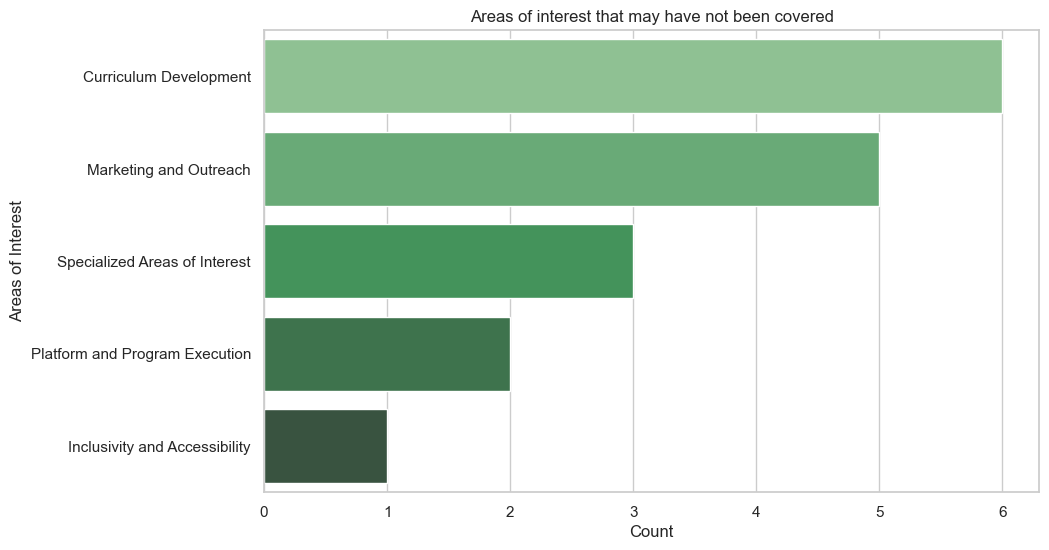

In [17]:
# Plotting the categories of areas that may not be covered
plt.figure(figsize=(10, 6))
sns.countplot(y='areas_mayNot_be_covered', data=df_pre, order=df_pre['areas_mayNot_be_covered'].value_counts().index, palette='Greens_d')
plt.title('Areas of interest that may have not been covered')
plt.xlabel('Count')
plt.ylabel('Areas of Interest');

### Improvements to better the training experience

In [18]:
# Displaying improvements and its categories
df_pre[['improvements', 'areas_of_improvement']].head()

,improvements,areas_of_improvement
0,You should be more practical rather than theor...,Curriculumn
1,Let's discuss the curriculum first then pedago...,Curriculumn
2,Time management,Time management
3,make the training more interractive and includ...,Participant Engagement
4,Time management,Time management


In [19]:
# Value count for areas of improvement
df_pre['areas_of_improvement'].value_counts()

Others                    18
Curriculumn               13
Time management            8
Participant Engagement     7
Logistics and planning     6
Time Management            5
Name: areas_of_improvement, dtype: int64

Rename 'Others' as `Miscellaneous` in the categories, `areas_of_improvement`, column and have same case for 'Time Management'

In [20]:
# Replacing categories
df_pre['areas_of_improvement'] = df_pre['areas_of_improvement'].replace('Others', 'Miscellaneous')
df_pre['areas_of_improvement'] = df_pre['areas_of_improvement'].replace('Time management', 'Time Management')

In [21]:
# Updated value count for areas of improvement
area_improv = df_pre['areas_of_improvement'].value_counts()
area_improv

Miscellaneous             18
Curriculumn               13
Time Management           13
Participant Engagement     7
Logistics and planning     6
Name: areas_of_improvement, dtype: int64

In [22]:
# Checkout 'Miscellaneous' category
df_pre[df_pre['areas_of_improvement'] == 'Miscellaneous'][['improvements', 'areas_of_improvement']]

,improvements,areas_of_improvement
6,None at the moment.,Miscellaneous
7,I can answer this after training,Miscellaneous
10,Increase sensitizations of digital skills prog...,Miscellaneous
15,Currently i am enjoying,Miscellaneous
19,Food,Miscellaneous
20,Feedback expected by the government,Miscellaneous
23,everything is running as per expectations,Miscellaneous
27,you are doing good,Miscellaneous
31,So far so good for now. Excellent job.,Miscellaneous
36,For the first day the training was perfect,Miscellaneous


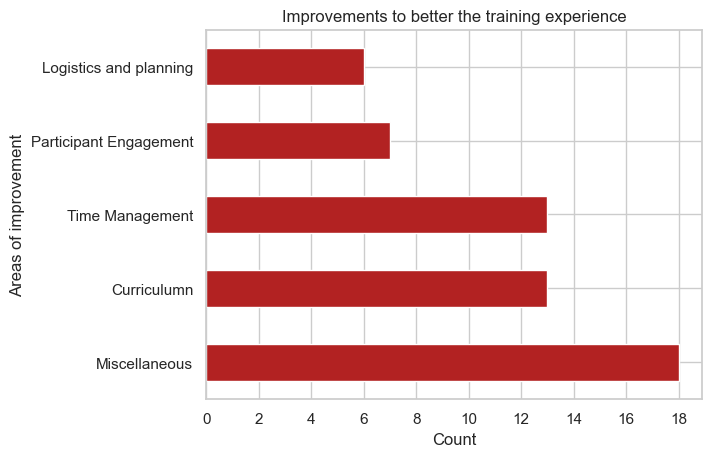

In [23]:
# Plotting the categories of improvement to better the training
area_improv.plot(kind='barh', color='firebrick')
plt.title('Improvements to better the training experience')
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Areas of improvement')

# Changing the labeling range for y-axis
plt.xticks(np.arange(0, int(area_improv.max()) + 1, 2));


## POST Training

Load the POST-training feedback data into a Pandas DataFrame and inspect the first few rows of the dataset.

In [24]:
# Load the POST-training feedback data
df_post = pd.read_csv('data/tot_post_training_feedback.csv')  

# Display the first few rows of the dataset
df_post.head()

,Timestamp,Did the training meet your expectations?,Which of your expectation(s) was met?,Which of your expectation(s) was not met?,"Which session(s) did you appreciate more, in relation to how they were applied in Foundation, Basic, Intermediate & Advanced levels",Any other session not listed above that you also appreciated,Was the training session interactive and engaging?,"On scale 1 to 5, how easy is to access & navigate the Smart Academy Portal? \n\n(Where 1 is extremely hard to navigate and 5 extremely easy to navigate)",Any recommendation on how to improve the Smart Academy portal?,What are some of the new skills/knowledge acquired during the training?,Kindly rate the professionalism and preparedness of the facilitators \n\n( With 1 - not prepared and less profession and 5 - well prepared and very professional),Any other general feedback,"Rate the venue of the training ( Cleanliness, food & Security)\n\n(1 - Worst, 5- Best)"
0,2024/01/19 3:42:16 PM GMT+3,Yes,Content delivery,NaN,Learning Principles;Facilitation and communica...,None,Yes,3,Easy of use for novice tech users,Content delivery,5,NaN,5
1,2024/01/19 3:42:39 PM GMT+3,Yes,Training guidelines,NaN,Learning Principles;Facilitation and communica...,Feeding program,Yes,4,Integration of the smart academy with institut...,Presentation skills,5,NaN,5
2,2024/01/19 3:42:39 PM GMT+3,Yes,Yes,NaN,Learning Principles;Facilitation and communica...,Incorporation of AI,Yes,5,Improve on time table n schedule,How to make an effective communication,5,No,5
3,2024/01/19 3:43:16 PM GMT+3,Yes,None,NaN,Learning Principles;Facilitation and communica...,Presentations,Yes,3,Ensure confidentiality in users details,Gamma.app,4,The session was good,5
4,2024/01/19 3:43:17 PM GMT+3,No,NaN,There were no expectations set,Learning Principles;Facilitation and communica...,Cyber security,Yes,2,Allow manual upload of trainees who cannot reg...,Lesson plan,4,None,3


In [25]:
# Renaming columns
df_post = df_post.rename(columns={
    'Did the training meet your expectations?  ':'meet_expectation',
    'Which of your expectation(s) was met?':'expectations_met',
    'Which of your expectation(s) was not met?':'expectations_not_met',
    'Which session(s) did you appreciate more, in relation to how they were applied in Foundation, Basic, Intermediate & Advanced levels':'sessions_appreciated',
    'Any other session not listed above that you also appreciated':'sessions_also_appreciated',
    'Was the training session interactive and engaging? ':'was_interactive',
    'On scale 1 to 5, how easy is to access & navigate the Smart Academy Portal? \n\n(Where 1 is extremely hard to navigate and 5 extremely easy to navigate)':'smartAcademy_access',
    'Any recommendation on how to improve the Smart Academy portal?':'smartAcademy_recommendations',
    'What are some of the new skills/knowledge acquired during the training?':'new_skill_learnt',
    'Kindly rate the professionalism and preparedness of the facilitators \n\n( With 1 - not prepared and less profession and 5 - well prepared and very professional)':'facilitators_professionalism',
    'Any other general feedback':'general_feedback',
    'Rate the venue of the training ( Cleanliness, food & Security)\n\n(1 - Worst,  5- Best)':'venue_ratings'
})

# Display the updated column names
df_post.columns

Index(['Timestamp', 'meet_expectation', 'expectations_met',
       'expectations_not_met', 'sessions_appreciated',
       'sessions_also_appreciated', 'was_interactive', 'smartAcademy_access',
       'smartAcademy_recommendations', 'new_skill_learnt',
       'facilitators_professionalism', 'general_feedback', 'venue_ratings'],
      dtype='object')

In [26]:
# Get information about the columns
df_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Timestamp                     50 non-null     object
 1   meet_expectation              50 non-null     object
 2   expectations_met              47 non-null     object
 3   expectations_not_met          3 non-null      object
 4   sessions_appreciated          50 non-null     object
 5   sessions_also_appreciated     46 non-null     object
 6   was_interactive               50 non-null     object
 7   smartAcademy_access           50 non-null     int64 
 8   smartAcademy_recommendations  46 non-null     object
 9   new_skill_learnt              50 non-null     object
 10  facilitators_professionalism  50 non-null     int64 
 11  general_feedback              34 non-null     object
 12  venue_ratings                 50 non-null     int64 
dtypes: int64(3), object(10

It was highly appropiate to come up with themes to group contents of some of the columns:
- expectations_met
- expectations_not_met
- sessions_also_appreciated
- smartAcademy_recommendations   
- new_skill_learned   
- general_feedback

Here is the file with the themes filled. `post_tot_training_feedback.csv`

In [27]:
# Load the new dataset
df_post = pd.read_csv('data/post_tot_training_feedback.csv')

# Drop the timestamp column
df_post = df_post.drop(columns='Timestamp', axis=1)

# Rename column 'new_skill_learned' TO 'new_skill_learnt'
df_post = df_post.rename(columns={'new_skill_learned': 'new_skill_learnt'})

# Display few rows of the dataset
df_post.head()

,meet_expectation,group_met_expectation,expectations_met,expectations_not_met,sessions_appreciated,sessions_also_appreciated,group_appreciated_sessions,was_interactive,smartAcademy_access,smartAcademy_recommendations,group_smartAcademy_recommendations,new_skill_learnt,skills_learnt,facilitators_professionalism,general_feedback,feedback_categories,venue_ratings
0,Yes,Training Program Design and Implementation,Content delivery,NaN,Learning Principles;Facilitation and communica...,NaN,NaN,Yes,3,Easy of use for novice tech users,Usability and User Interface,Content delivery,Teaching & Insructional,5,NaN,NaN,5
1,Yes,Training Program Design and Implementation,Training guidelines,NaN,Learning Principles;Facilitation and communica...,Feeding program,Miscellaneous.,Yes,4,Integration of the smart academy with institut...,Integration and Accessibility,Presentation skills,Teaching & Insructional,5,NaN,NaN,5
2,Yes,Miscellaneous,Yes,NaN,Learning Principles;Facilitation and communica...,Incorporation of AI,AI Integration,Yes,5,Improve on time table n schedule,NaN,How to make an effective communication,Teaching & Insructional,5,NaN,NaN,5
3,Yes,NaN,NaN,NaN,Learning Principles;Facilitation and communica...,Presentations,Communication and Coordination,Yes,3,Ensure confidentiality in users details,Data Management and Validation,Gamma.app,Use of AI,4,The session was good,Positive Feedback,5
4,No,NaN,NaN,There were no expectations set,Learning Principles;Facilitation and communica...,Cybersecurity,Cybersecurity,Yes,2,Allow manual upload of trainees who cannot reg...,Registration and Enrollment,Lesson plan,Teaching & Insructional,4,NaN,NaN,3


### Expectations

In [28]:
# Percentage of responses for expectations met
df_post['meet_expectation'].value_counts()*(100/50)

Yes    94.0
No      6.0
Name: meet_expectation, dtype: float64

### Expectations met

In [29]:
# Expectation met and their categories
df_post[df_post['expectations_met'].isna() == False][['expectations_met', 'group_met_expectation']].head(10)

,expectations_met,group_met_expectation
0,Content delivery,Training Program Design and Implementation
1,Training guidelines,Training Program Design and Implementation
2,Yes,Miscellaneous
5,Successful TOT Program,Training Program Design and Implementation
6,"How to prepare for the training, or training m...",Training Program Design and Implementation
7,Lesson plan. How to deliver content,Training Program Design and Implementation
8,Understanding the structure and implementation...,Training Program Design and Implementation
9,Program training and assessment,Training Program Design and Implementation
10,How to use the smartacademy system,Smartacademy System and Logistics
11,Training outscomes achieved,Training Program Design and Implementation


In [30]:
# Value count for different groups of expectations
df_post['group_met_expectation'].value_counts()

Training Program Design and Implementation    13
Teaching Skills and Methods.                  12
Digital Skills and Empowerment.                5
 Smartacademy System and Logistics             4
Digital Skills and Empowerment                 4
Program Evaluation and Improvement             3
Smartacademy System and Logistics              2
Miscellaneous                                  1
Program Evaluation and Improvement.            1
Name: group_met_expectation, dtype: int64

We observed variations in spellings and cases for similar categories such as `'Digital Skills and Empowerment.'` and `'Digital Skills and Empowerment'`. To ensure consistency, we have standardized the spellings and cases.

In [31]:
# Standardizing spellings and cases in the "group_met_expectation" column
df_post['group_met_expectation'] = df_post['group_met_expectation'].replace('Digital Skills and Empowerment.', 'Digital Skills and Empowerment')
df_post['group_met_expectation'] = df_post['group_met_expectation'].replace(' Smartacademy System and Logistics', 'Smartacademy System and Logistics')
df_post['group_met_expectation'] = df_post['group_met_expectation'].replace('Program Evaluation and Improvement.', 'Program Evaluation and Improvement')
df_post['group_met_expectation'] = df_post['group_met_expectation'].replace('Teaching Skills and Methods.', 'Teaching Skills and Methods')

# Value count for the updated 'group_met_expectation'
met_expectation_count = df_post['group_met_expectation'].value_counts()
met_expectation_count

Training Program Design and Implementation    13
Teaching Skills and Methods                   12
Digital Skills and Empowerment                 9
Smartacademy System and Logistics              6
Program Evaluation and Improvement             4
Miscellaneous                                  1
Name: group_met_expectation, dtype: int64

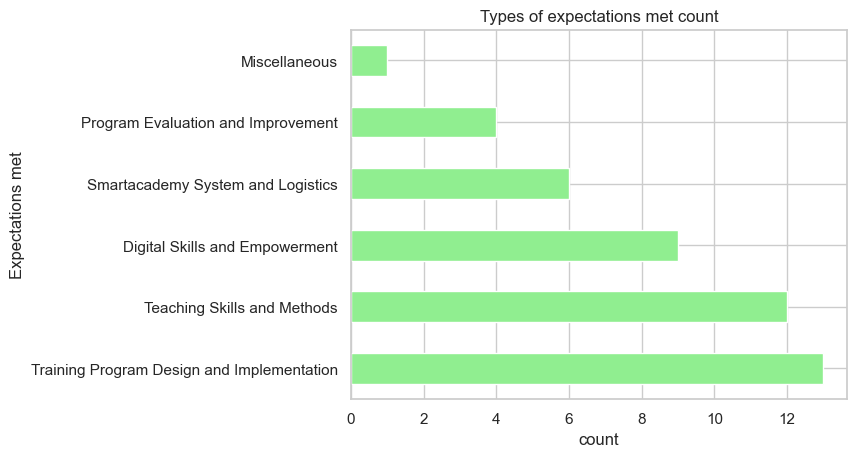

In [32]:
# Plot types of expectations met
met_expectation_count.plot(kind='barh', color='lightgreen')
plt.xlabel('count')
plt.ylabel('Expectations met')
plt.title('Types of expectations met count');

### Expectations NOT met

In [33]:
# Display the expectations NOT met
df_post[df_post['expectations_not_met'].isna() == False]['expectations_not_met']

4                        There were no expectations set
23    The deliverables and outcomes and impacts of t...
45    I thought that there would some allowances for...
Name: expectations_not_met, dtype: object

As per the feedback, there were only 3 expectations NOT met:
- 'There were no expectations set'
- 'The deliverables and outcomes and impacts of the training were not well articulated'
- 'I thought that there would be some allowances for the Attendees.'

### Sessions Appreciated

In [34]:
# Value count of sessions appreciated
sessions_app = df_post['sessions_appreciated'].value_counts()
sessions_app

Learning Principles;Facilitation and communication;Assessment & Evaluation;Evaluation & Feedback    29
Learning Principles                                                                                  6
Learning Principles;Facilitation and communication;Assessment & Evaluation                           3
Assessment & Evaluation                                                                              3
Facilitation and communication;Assessment & Evaluation                                               3
Facilitation and communication;Evaluation & Feedback                                                 2
Evaluation & Feedback                                                                                2
Learning Principles;Facilitation and communication;Evaluation & Feedback                             1
Learning Principles;Facilitation and communication                                                   1
Name: sessions_appreciated, dtype: int64

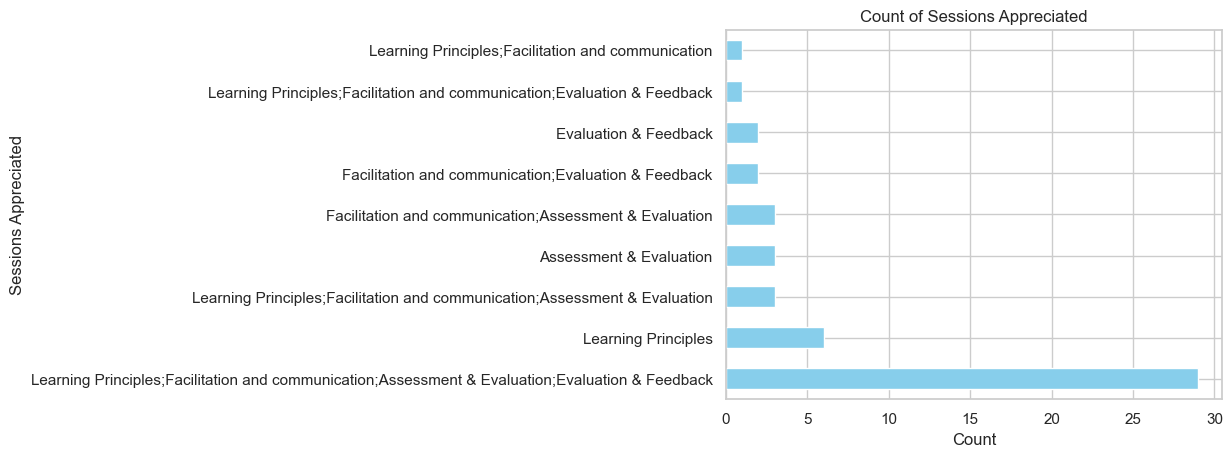

In [35]:
# Plotting the categories of sessions appreciated
sessions_app.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Sessions Appreciated')
plt.title('Count of Sessions Appreciated');

### Other Sessions also appreciated

In [36]:
# Value count of other sessions appreciated
df_post[df_post['sessions_also_appreciated'].isna() == False]['group_appreciated_sessions'].value_counts()

Cybersecurity                      10
Communication and Coordination      9
Miscellanous                        8
AI Integration                      5
Content Creation and Evaluation     4
Training and Development            4
Miscellaneous.                      1
Name: group_appreciated_sessions, dtype: int64

In [37]:
# Rename both Miscellaneous. and Miscellanous to Miscellaneous
df_post['group_appreciated_sessions'] = df_post['group_appreciated_sessions'].replace('Miscellanous','Miscellaneous')
df_post['group_appreciated_sessions'] = df_post['group_appreciated_sessions'].replace('Miscellaneous. ','Miscellaneous')

# Updated value count
sessions_count = df_post[df_post['sessions_also_appreciated'].isna() == False]['group_appreciated_sessions'].value_counts()
sessions_count

Cybersecurity                      10
Miscellaneous                       9
Communication and Coordination      9
AI Integration                      5
Content Creation and Evaluation     4
Training and Development            4
Name: group_appreciated_sessions, dtype: int64

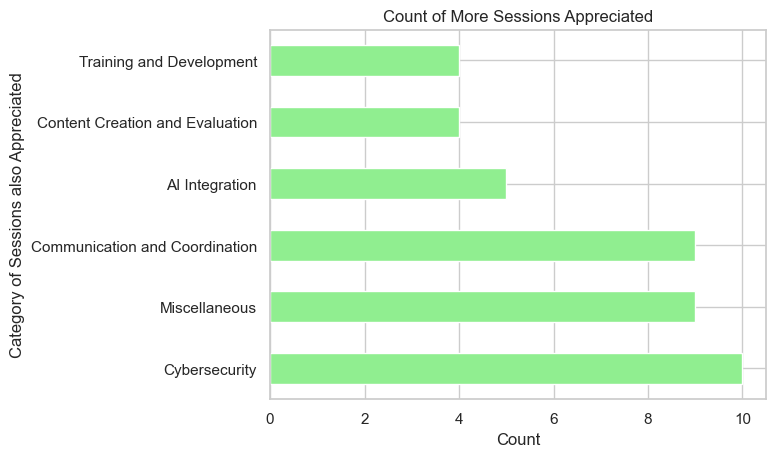

In [38]:
# Plot count of session also appreciated
sessions_count.plot(kind='barh', color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Category of Sessions also Appreciated')
plt.title('Count of More Sessions Appreciated');

### Was the training session interactive and engaging?

In [39]:
# Check if all participants had same answer in 'was_interactive' column
df_post['was_interactive'].value_counts() == df_post.shape[0]

Yes    True
Name: was_interactive, dtype: bool

`All` participants gave feedback that the training was interactive

### Facilitators Professionalism

In [40]:
# Value count for the ratings of facilitators professionalism
df_post['facilitators_professionalism'].value_counts()

5    27
4    19
3     2
1     1
2     1
Name: facilitators_professionalism, dtype: int64

### Smart-Academy Access

On scale 1 to 5, how easy was to access and navigate the Smart Academy Portal? (Where 1 is extremely hard to navigate and 5 extremely easy to navigate)

In [41]:
# Value count for Ratings of SmartAcademy access
sa_ratings_count = df_post['smartAcademy_access'].value_counts()
sa_ratings_count

4    22
3    14
5    10
2     4
Name: smartAcademy_access, dtype: int64

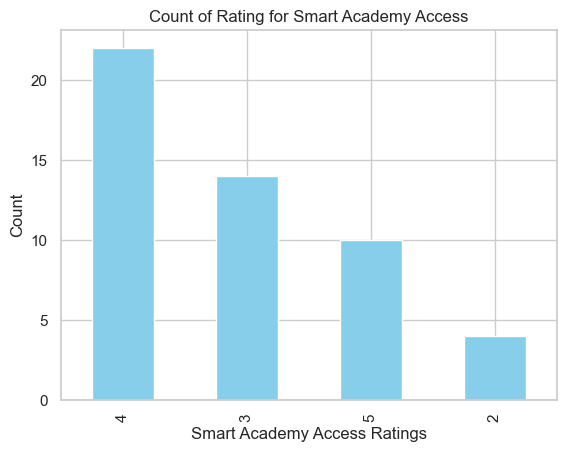

In [42]:
# Plot the SmartAcademy ratings v Value count
sa_ratings_count.plot(kind='bar', color='skyblue')
plt.xlabel('Smart Academy Access Ratings')
plt.ylabel('Count')
plt.title('Count of Rating for Smart Academy Access');

### Smart Academy Recommendations

In [43]:
# Check number of responses given in 'smartAcademy_recommendations' column
sa_recom = df_post['smartAcademy_recommendations'].isna() == False
print('Recommendations for Smart Academy: ',sa_recom.sum())

# Value count for groups of recommendations
sa_recom_count = df_post[sa_recom]['group_smartAcademy_recommendations'].value_counts()
sa_recom_count


Recommendations for Smart Academy:  39


Registration and Enrollment       11
Usability and User Interface       9
Miscellaneous                      8
Integration and Accessibility      6
Data Management and Validation     1
Communication and Feedback         1
Name: group_smartAcademy_recommendations, dtype: int64

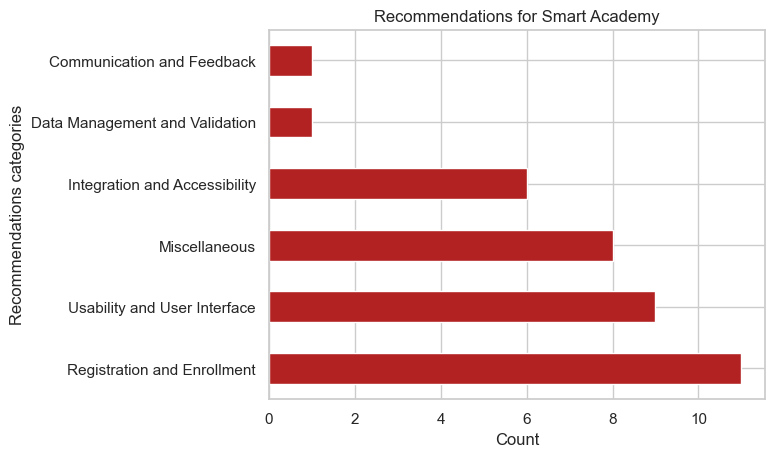

In [44]:
# Plot SmartAcademy recommendation categories v Value Count
sa_recom_count.plot(kind='barh', color='firebrick')
plt.xlabel('Count')
plt.ylabel('Recommendations categories')
plt.title('Recommendations for Smart Academy');

In [45]:
# Displaying the feedback for the highest recommendation category "Registration and Enrollment"
df_post[df_post['group_smartAcademy_recommendations'] == 'Registration and Enrollment'][['smartAcademy_recommendations']]

,smartAcademy_recommendations
4,Allow manual upload of trainees who cannot reg...
29,Include bulk registrations for cases where hug...
31,Less registration fields
34,Easier registration for trainees
35,For the enrollment demo ... Have demo accounts...
36,Map emails to correct TOTs
38,Let us have an option of deleting and upgradin...
41,The default password is not changeable on your...
42,I had an issue on log in so kindly confirm the...
44,Make the registration form simple and easy for...


### New Skills Learnt

In [46]:
# Value count for skills learnt
new_skills = df_post['skills_learnt'].value_counts()
new_skills

Teaching & Insructional    29
Use of AI                  10
Cybersecurity               7
System Management           3
Project Management          1
Name: skills_learnt, dtype: int64

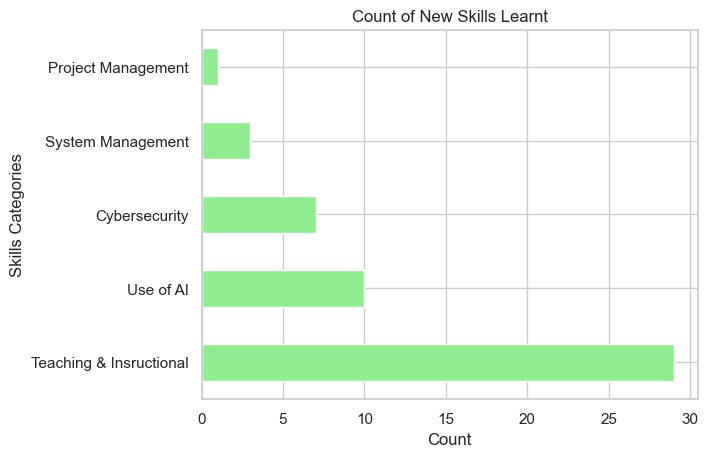

In [47]:
# Plot the ctegories and count of new skills learnt
new_skills.plot(kind='barh', color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Skills Categories')
plt.title('Count of New Skills Learnt');


### Facilitators' Professionalism Ratings

5    27
4    19
3     2
1     1
2     1
Name: facilitators_professionalism, dtype: int64


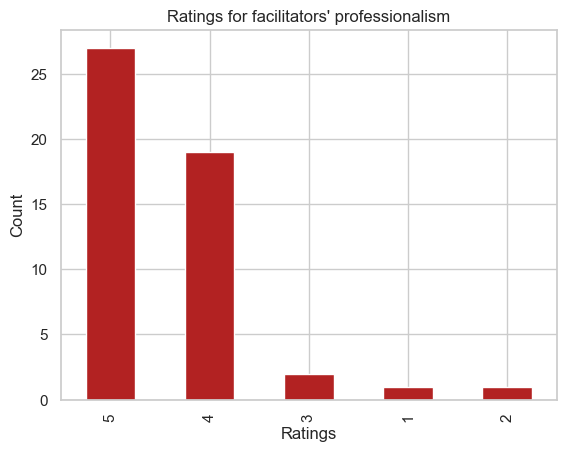

In [48]:
# Value count of ratings for facilitators' professionalism
facilitators_ratings = df_post['facilitators_professionalism'].value_counts()
print(facilitators_ratings)


# Plot of ratings v count
facilitators_ratings.plot(kind='bar', color='firebrick')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Ratings for facilitators\' professionalism');

### General Feedback

In [49]:
# Number of general feedbacks given
print ('Total number of General Feedback: ', df_post.shape[0] - df_post['general_feedback'].isna().sum())

Total number of General Feedback:  26


In [50]:
# Value count for different feedback categories
df_post[df_post['general_feedback'].isna() == False]['feedback_categories'].value_counts()


Positive Feedback          16
Logistical Feedback         4
Improvement Suggestions     4
Posiitive Feeback           1
Certification Enquiry       1
Name: feedback_categories, dtype: int64

In [51]:
# Spelling correction for 'Posiitive feedback'
df_post['feedback_categories'] = df_post['feedback_categories'].replace('Posiitive Feeback','Positive Feedback')

# Display updated value count
general_feedback = df_post[df_post['general_feedback'].isna() == False]['feedback_categories'].value_counts()
general_feedback

Positive Feedback          17
Logistical Feedback         4
Improvement Suggestions     4
Certification Enquiry       1
Name: feedback_categories, dtype: int64

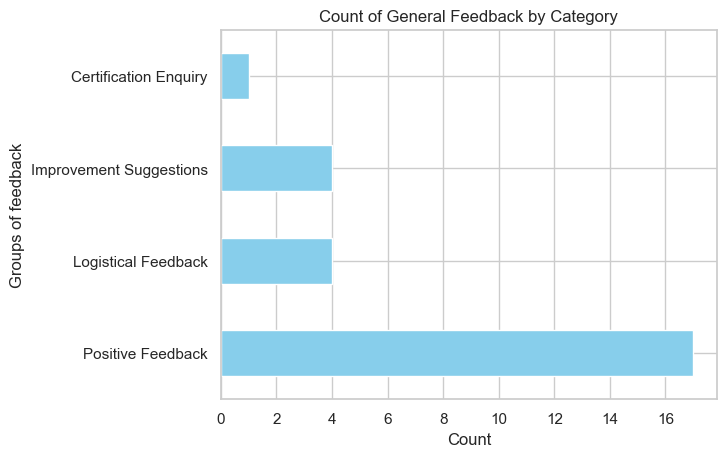

In [52]:
# Plot for general feedback's categories v value count
general_feedback.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Groups of feedback')
plt.title('Count of General Feedback by Category');

### Venue Ratings

5    35
4    11
3     3
2     1
Name: venue_ratings, dtype: int64


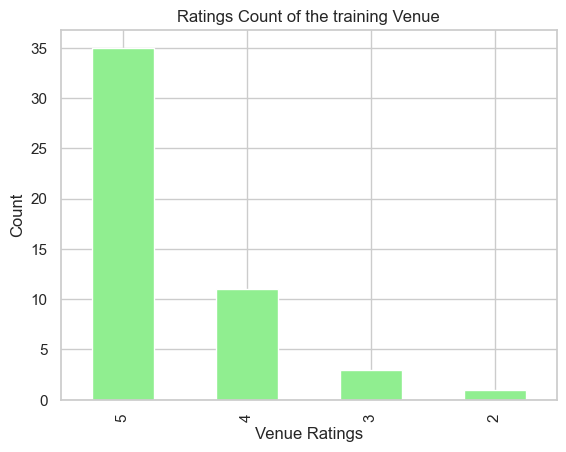

In [53]:
# Value count for venue ratings
venue_ratings = df_post['venue_ratings'].value_counts()
print(venue_ratings)

# Plot count of different ratings
venue_ratings.plot(kind='bar', color='lightgreen')
plt.xlabel('Venue Ratings')
plt.ylabel('Count')
plt.title('Ratings Count of the training Venue');

----

# THE END